## AUTO ARIMA MODEL - UNIVARIATE

In [1]:
# Read in datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

USA_train_imputed = pd.read_csv("USA_train.csv")
USA_test_imputed = pd.read_csv("USA_test.csv")
USA_train_imputed.set_index('date', inplace=True)
USA_test_imputed.set_index('date', inplace=True)

Brazil_train_imputed = pd.read_csv("Brazil_train.csv")
Brazil_test_imputed = pd.read_csv("Brazil_test.csv")
Brazil_train_imputed.set_index('date', inplace=True)
Brazil_test_imputed.set_index('date', inplace=True)

Germany_train_imputed = pd.read_csv("Germany_train.csv")
Germany_test_imputed = pd.read_csv("Germany_test.csv")
Germany_train_imputed.set_index('date', inplace=True)
Germany_test_imputed.set_index('date', inplace=True)

Nigeria_train_imputed = pd.read_csv("Nigeria_train.csv")
Nigeria_test_imputed = pd.read_csv("Nigeria_test.csv")
Nigeria_train_imputed.set_index('date', inplace=True)
Nigeria_test_imputed.set_index('date', inplace=True)

China_train_imputed = pd.read_csv("China_train.csv")
China_test_imputed = pd.read_csv("China_test.csv")
China_train_imputed.set_index('date', inplace=True)
China_test_imputed.set_index('date', inplace=True)

Australia_train_imputed = pd.read_csv("Australia_train.csv")
Australia_test_imputed = pd.read_csv("Australia_test.csv")
Australia_train_imputed.set_index('date', inplace=True)
Australia_test_imputed.set_index('date', inplace=True)

#### STATIONARITY: ARIMA File shows which datasets are stationary and non-stationary. USA, Brazil, and Australia data is non-stationary, so log transformations will be applied to make them stationary. Rest of datasets will have no transformations

### USA

In [13]:
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Log transformation in order to make stationary
USA_train_target = USA_train_imputed['new_cases']
USA_train_target += 0.00000000001
USA_test_target = USA_test_imputed['new_cases']
USA_test_target += 0.00000000001
USA_train_log = np.log(USA_train_target)
USA_test_log = np.log(USA_test_target)

In [7]:
# RUN AUTO ARIMA PACKAGE
USA_auto_arima_model = auto_arima(USA_train_log, start_p=1, start_q=1,
                      test='adf',
                      max_p=7, max_q=7,
                      m=1,                       
                      seasonal=True,   
                      start_P=1, d=1, D=0,  
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3592.016, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4135.357, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3731.195, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3669.620, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4133.462, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3554.163, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3561.449, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3559.195, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3550.805, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3590.572, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3538.167, Time=0.22 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=3525.422, Time=0.36 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=3523.427, Time=0.27 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=3527.790, Time=0.24 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept

<AxesSubplot:xlabel='date'>

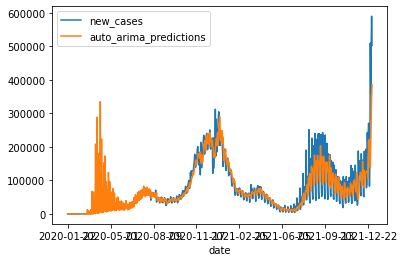

In [8]:
# FIND TRAIN RMSE AND PLOT
predictions = USA_auto_arima_model.predict_in_sample()
USA_train_imputed['auto_arima_predictions'] = np.exp(predictions)
USA_train_imputed.plot(y=["new_cases", "auto_arima_predictions"])

In [14]:
rmse = np.sqrt(mean_squared_error(USA_train_imputed['new_cases'], np.exp(predictions)))
rmse

44331.077771378616

In [15]:
# TEST PREDICTIONS AND RMSE
USA_predictions2 = USA_auto_arima_model.predict(n_periods=len(USA_test_target))
rmse = np.sqrt(mean_squared_error(USA_test_target, np.exp(USA_predictions2)))
rmse

350667.86589845055

<AxesSubplot:xlabel='date'>

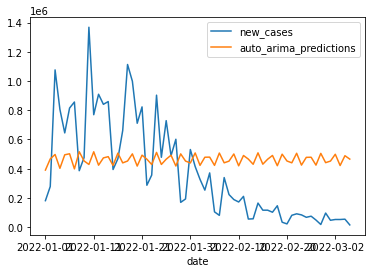

In [16]:
USA_test_imputed['auto_arima_predictions'] = np.exp(USA_predictions2)
USA_test_imputed.plot(y=["new_cases", "auto_arima_predictions"])

### BRAZIL

In [18]:
# Log transformation in order to make stationary
Brazil_train_target = Brazil_train_imputed['new_cases']
Brazil_train_target += 0.00000000001
Brazil_test_target = Brazil_test_imputed['new_cases']
Brazil_test_target += 0.00000000001
Brazil_train_log = np.log(Brazil_train_target)
Brazil_test_log = np.log(Brazil_test_target)

In [19]:
# RUN AUTO ARIMA PACKAGE
Brazil_auto_arima_model = auto_arima(Brazil_train_log, start_p=1, start_q=1,
                      test='adf',
                      max_p=7, max_q=7,
                      m=1,                       
                      seasonal=True,   
                      start_P=1, d=1, D=0,  
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3021.026, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3489.605, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3152.251, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3074.849, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3487.617, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3022.026, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3020.959, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3020.569, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3021.136, Time=0.16 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3020.459, Time=0.20 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3021.776, Time=0.33 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=3023.081, Time=0.18 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3024.770, Time=0.15 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : 

<AxesSubplot:xlabel='date'>

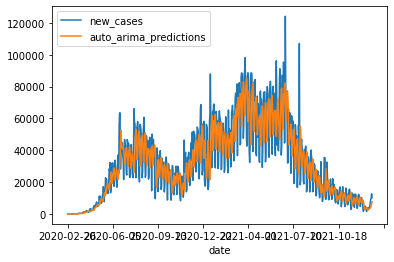

In [20]:
# FIND TRAIN RMSE AND PLOT
predictions = Brazil_auto_arima_model.predict_in_sample()
Brazil_train_imputed['auto_arima_predictions'] = np.exp(predictions)
Brazil_train_imputed.plot(y=["new_cases", "auto_arima_predictions"])

In [21]:
rmse = np.sqrt(mean_squared_error(Brazil_train_imputed['new_cases'], np.exp(predictions)))
rmse

17150.822800579597

In [22]:
# TEST PREDICTIONS AND RMSE
Brazil_predictions2 = Brazil_auto_arima_model.predict(n_periods=len(Brazil_test_target))
rmse = np.sqrt(mean_squared_error(Brazil_test_target, np.exp(Brazil_predictions2)))
rmse

117175.98648934798

<AxesSubplot:xlabel='date'>

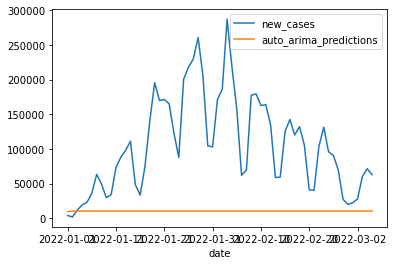

In [23]:
Brazil_test_imputed['auto_arima_predictions'] = np.exp(Brazil_predictions2)
Brazil_test_imputed.plot(y=["new_cases", "auto_arima_predictions"])

### AUSTRALIA

In [24]:
# Log transformation in order to make stationary
Australia_train_target = Australia_train_imputed['new_cases']
Australia_train_target += 0.00000000001
Australia_test_target = Australia_test_imputed['new_cases']
Australia_test_target += 0.00000000001
Australia_train_log = np.log(Australia_train_target)
Australia_test_log = np.log(Australia_test_target)

In [25]:
# RUN AUTO ARIMA PACKAGE
Australia_auto_arima_model = auto_arima(Australia_train_log, start_p=1, start_q=1,
                      test='adf',
                      max_p=7, max_q=7,
                      m=1,                       
                      seasonal=True,   
                      start_P=1, d=1, D=0,  
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3584.793, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3885.964, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3683.240, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3591.421, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3883.972, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3511.317, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3537.089, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3513.314, Time=0.22 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3513.300, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3573.967, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3524.142, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3505.503, Time=0.25 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=3488.539, Time=0.35 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=3487.895, Time=0.24 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept

<AxesSubplot:xlabel='date'>

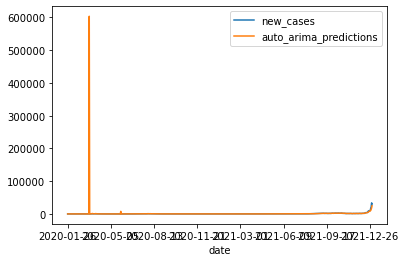

In [26]:
# FIND TRAIN RMSE AND PLOT
predictions = Australia_auto_arima_model.predict_in_sample()
Australia_train_imputed['auto_arima_predictions'] = np.exp(predictions)
Australia_train_imputed.plot(y=["new_cases", "auto_arima_predictions"])

In [27]:
rmse = np.sqrt(mean_squared_error(Australia_train_imputed['new_cases'], np.exp(predictions)))
rmse

22737.525322613274

In [28]:
# TEST PREDICTIONS AND RMSE
Australia_predictions2 = Australia_auto_arima_model.predict(n_periods=len(Australia_test_target))
rmse = np.sqrt(mean_squared_error(Australia_test_target, np.exp(Australia_predictions2)))
rmse

36381.43700747358

<AxesSubplot:xlabel='date'>

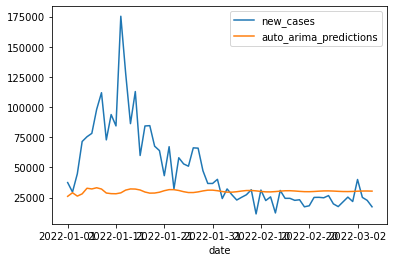

In [29]:
Australia_test_imputed['auto_arima_predictions'] = np.exp(Australia_predictions2)
Australia_test_imputed.plot(y=["new_cases", "auto_arima_predictions"])

### GERMANY

In [30]:
# No log transformation, as it is already stationary
Germany_train_target = Germany_train_imputed['new_cases']
Germany_test_target = Germany_test_imputed['new_cases']

In [31]:
# RUN AUTO ARIMA PACKAGE
Germany_auto_arima_model = auto_arima(Germany_train_target, start_p=1, start_q=1,
                      test='adf',
                      max_p=7, max_q=7,
                      m=1,                       
                      seasonal=True,   
                      start_P=1, d=1, D=0,  
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14618.308, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14837.939, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14754.978, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14644.330, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14835.948, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14613.164, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=14752.138, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=14545.170, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=14711.267, Time=0.06 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=14454.180, Time=0.16 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=14605.192, Time=0.10 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=14365.732, Time=0.27 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=14446.498, Time=0.16 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=14307.828, Time=0.45 sec
 ARIMA(6,1,0)(0,0,0

<AxesSubplot:xlabel='date'>

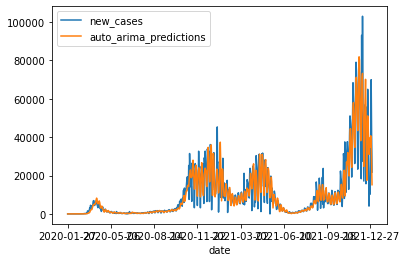

In [32]:
# FIND TRAIN RMSE AND PLOT
predictions = Germany_auto_arima_model.predict_in_sample()
Germany_train_imputed['auto_arima_predictions'] = (predictions)
Germany_train_imputed.plot(y=["new_cases", "auto_arima_predictions"])

In [33]:
rmse = np.sqrt(mean_squared_error(Germany_train_imputed['new_cases'], (predictions)))
rmse

5965.4098885721705

In [35]:
#TEST PREDICTIONS AND RMSE
Germany_predictions2 = Germany_auto_arima_model.predict(n_periods=len(Germany_test_target))
rmse = np.sqrt(mean_squared_error(Germany_test_target, (Germany_predictions2)))
rmse

143596.50816257758

<AxesSubplot:xlabel='date'>

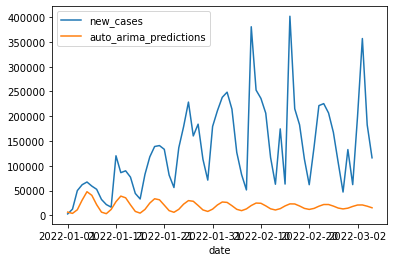

In [36]:
Germany_test_imputed['auto_arima_predictions'] = (Germany_predictions2)
Germany_test_imputed.plot(y=["new_cases", "auto_arima_predictions"])

### NIGERIA

In [37]:
# No log transformation, as it is already stationary
Nigeria_train_target = Nigeria_train_imputed['new_cases']
Nigeria_test_target = Nigeria_test_imputed['new_cases']

In [38]:
# RUN AUTO ARIMA PACKAGE
Nigeria_auto_arima_model = auto_arima(Nigeria_train_target, start_p=1, start_q=1,
                      test='adf',
                      max_p=7, max_q=7,
                      m=1,                       
                      seasonal=True,   
                      start_P=1, d=1, D=0,  
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9562.825, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9930.209, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9710.027, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9567.321, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9928.210, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9564.258, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9569.258, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=9562.495, Time=0.21 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=9564.387, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=9564.976, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=9560.781, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=9565.684, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=9567.623, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=9562.664, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]          

<AxesSubplot:xlabel='date'>

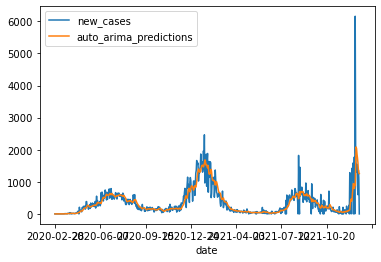

In [39]:
# FIND TRAIN RMSE AND PLOT
predictions = Nigeria_auto_arima_model.predict_in_sample()
Nigeria_train_imputed['auto_arima_predictions'] = (predictions)
Nigeria_train_imputed.plot(y=["new_cases", "auto_arima_predictions"])

In [40]:
rmse = np.sqrt(mean_squared_error(Nigeria_train_imputed['new_cases'], (predictions)))
rmse

295.5494901689106

In [41]:
#TEST PREDICTIONS AND RMSE
Nigeria_predictions2 = Nigeria_auto_arima_model.predict(n_periods=len(Nigeria_test_target))
rmse = np.sqrt(mean_squared_error(Nigeria_test_target, (Nigeria_predictions2)))
rmse

798.6282441149165

<AxesSubplot:xlabel='date'>

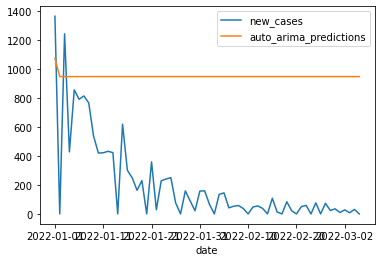

In [42]:
Nigeria_test_imputed['auto_arima_predictions'] = (Nigeria_predictions2)
Nigeria_test_imputed.plot(y=["new_cases", "auto_arima_predictions"])

### CHINA

In [43]:
# No log transformation, as it is already stationary
China_train_target = China_train_imputed['new_cases']
China_test_target = China_test_imputed['new_cases']

In [44]:
# RUN AUTO ARIMA PACKAGE
China_auto_arima_model = auto_arima(China_train_target, start_p=1, start_q=1,
                      test='adf',
                      max_p=7, max_q=7,
                      m=1,                       
                      seasonal=True,   
                      start_P=1, d=1, D=0,  
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11052.371, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11297.570, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11193.852, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11057.824, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11295.571, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11048.677, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11111.966, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=11050.673, Time=0.15 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11049.882, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11048.991, Time=0.27 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=11078.309, Time=0.06 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=11050.349, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=11046.681, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=11050.383, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0

<AxesSubplot:xlabel='date'>

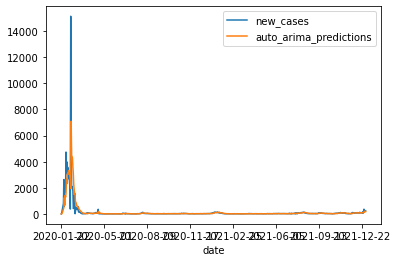

In [45]:
# FIND TRAIN RMSE AND PLOT
predictions = China_auto_arima_model.predict_in_sample()
China_train_imputed['auto_arima_predictions'] = (predictions)
China_train_imputed.plot(y=["new_cases", "auto_arima_predictions"])

In [46]:
rmse = np.sqrt(mean_squared_error(China_train_imputed['new_cases'], (predictions)))
rmse

580.6842640526598

In [47]:
#TEST PREDICTIONS AND RMSE
China_predictions2 = China_auto_arima_model.predict(n_periods=len(China_test_target))
rmse = np.sqrt(mean_squared_error(China_test_target, (China_predictions2)))
rmse

102.32010142248677

<AxesSubplot:xlabel='date'>

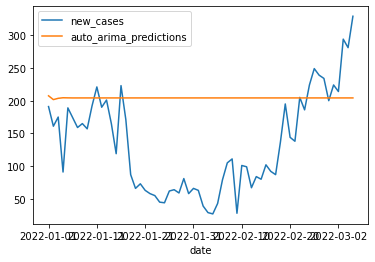

In [49]:
China_test_imputed['auto_arima_predictions'] = (China_predictions2)
China_test_imputed.plot(y=["new_cases", "auto_arima_predictions"])